In [11]:
import tensorflow as tf
import pandas as pd
import numpy

In [12]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\Asus\Desktop\vish\project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Asus\Desktop\vish\project\majorproject1.h5
C:\Users\Asus\Desktop\vish\project\mnist_test.csv
C:\Users\Asus\Desktop\vish\project\mnist_train.csv
C:\Users\Asus\Desktop\vish\project\Untitled.ipynb
C:\Users\Asus\Desktop\vish\project\Untitled1.ipynb
C:\Users\Asus\Desktop\vish\project\vish.csv
C:\Users\Asus\Desktop\vish\project\.ipynb_checkpoints\Untitled-checkpoint.ipynb
C:\Users\Asus\Desktop\vish\project\.ipynb_checkpoints\Untitled1-checkpoint.ipynb
C:\Users\Asus\Desktop\vish\project\.logs\fit\20230512-044913\train\events.out.tfevents.1683847156.VISH.8956.0.v2
C:\Users\Asus\Desktop\vish\project\.logs\fit\20230512-044913\validation\events.out.tfevents.1683847175.VISH.8956.1.v2


In [13]:
train = pd.read_csv('C:/Users/Asus/Desktop/vish/project/mnist_train.csv')
test = pd.read_csv('C:/Users/Asus/Desktop/vish/project/mnist_test.csv')

In [14]:
train.shape

(60000, 785)

In [17]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]
Y_test=test.iloc[]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split( X, y, test_size = 0.2,random_state = 1212)

In [21]:
x_train_re = X_train.to_numpy().reshape(48000, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(12000, 28, 28)
y_validation_re = y_validation.values
x_test_re = X_test.to_numpy().reshape(10000, 28, 28)

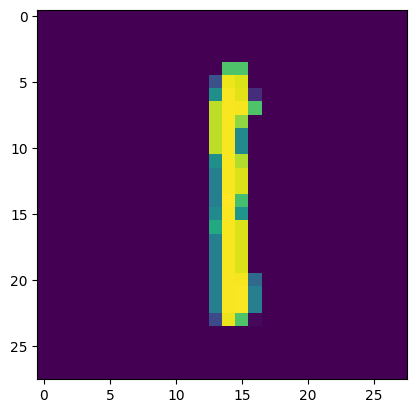

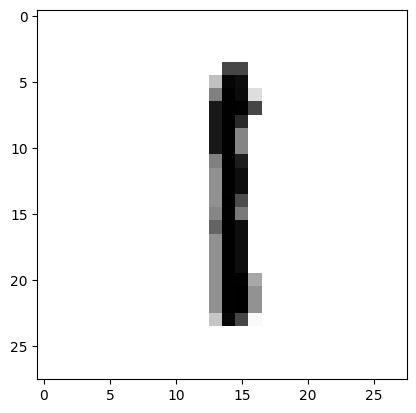

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x_train_re[0])
plt.show()
plt.imshow(x_train_re[0], cmap=plt.cm.binary)


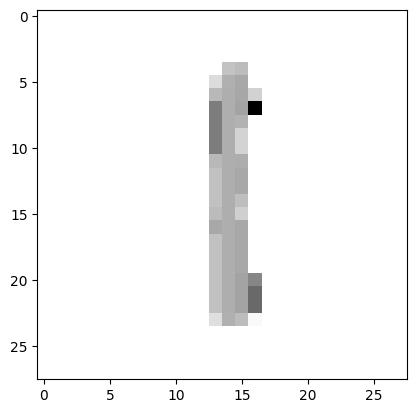

In [28]:
x_train_re= tf.keras.utils.normalize(x_train_re,axis=1)
x_test_re=tf.keras.utils.normalize(x_test_re,axis=1)
plt.imshow(x_train_re[0], cmap=plt.cm.binary)

In [29]:
print(x_train_re[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [32]:
print(y_train_re[0])

1


In [33]:
import numpy as np
IMG_SIZE=28
new_x=np.array(x_train_re).reshape(-1,28,28,1)
new_testx=np.array(x_validation_re).reshape(-1,28,28,1)
print(new_x.shape)
print(new_testx.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Activation


In [45]:
model= Sequential()
model.add(Conv2D(64,(3,3),input_shape=new_x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))


In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_4 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_5 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [49]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [50]:
model.fit(x_train_re,y_train_re,validation_data=(x_validation_re,y_validation_re),epochs=10)

Epoch 1/10
1500/1500 [==============================] - 88s 53ms/step - loss: 0.3164 - accuracy: 0.9019 - val_loss: 74.5613 - val_accuracy: 0.9383
Epoch 2/10
1500/1500 [==============================] - 78s 52ms/step - loss: 0.1037 - accuracy: 0.9687 - val_loss: 82.9547 - val_accuracy: 0.9309
Epoch 3/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0716 - accuracy: 0.9776 - val_loss: 203.3189 - val_accuracy: 0.8632
Epoch 4/10
1500/1500 [==============================] - 67s 45ms/step - loss: 0.0555 - accuracy: 0.9826 - val_loss: 232.0571 - val_accuracy: 0.8817
Epoch 5/10
1500/1500 [==============================] - 67s 45ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 166.7538 - val_accuracy: 0.9042
Epoch 6/10
1500/1500 [==============================] - 65s 44ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 230.5630 - val_accuracy: 0.8795
Epoch 7/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss

In [ ]:
test_loss,test_acc=model.evaluate(new_testx,y_train)